Изучение данных о выданных ипотечных кредитах в целом по банковской системе. Источник cbr.ru.
1. Проверка влияния процентных ставок на количество и объём выданных кредитов
2. Построение модели лин регрессии - зависимость объема и количества выданных ипотечных кредитов от % ставок

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

%matplotlib inline
import datetime as dt

data = pd.read_csv('data.csv',';', index_col=['Date'], parse_dates=['Date'], dayfirst=True)

In [75]:
data.head()

,N,N change,Value,Value change,rate,rate change
Date,,,,,,
2009-02-01,4967,0,6421,0,14.20,0.00
2009-03-01,11056,6089,14384,7963,14.47,0.27
2009-04-01,18542,7486,23330,8946,14.60,0.13
2009-05-01,26695,8153,32453,9123,14.88,0.28
2009-06-01,34514,7819,41733,9280,14.62,-0.26


In [76]:
# 1А Проверка влияния процентных ставок на КОЛИЧЕСТВО выданных ипотечных кредитов. Для анализа рассмотрим два периода: 
# с 01.05.2013 по 01.04.2013 (докризисный период с более низкими ставками) 
# с 01.05.2015 по 01.04.2015 (посткризисный период с более высокими ставками)

In [77]:
data.columns

Index(['N', 'N change', 'Value', 'Value change', 'rate', 'rate change'], dtype='object')

In [78]:
y1 = np.array(data.loc['2013-05-01':'2014-04-01', 'N'])
y2 = np.array(data.loc['2015-05-01':'2016-04-01', 'N'])

Требуется проверить гипотезу у равенстве среднего кол-ва выданных кредитов по каждой группе. Для проверки этой гипотезы воспользуемся однофакторным дисперсионным анализом.

In [79]:
n1 = y1.shape[0]
n2 = y2.shape[0]

Выборочные средние по каждой группе:

In [80]:
y1_mean = y1.mean()
y2_mean = y2.mean()

y1_mean, y2_mean

(400624.25, 337682.6666666667)

Видно, что среднее кол-во выданных кредитов разнится. Проверим статистическую значимость этого отличия.

Соберём все значения кол-ва выданных кредитов в один массив:

In [81]:
y = np.concatenate([y1, y2])

print(y)

[210950 269452 335210 409887 484319 556099 637642 717498 823175  47662
 117701 197896 184431 228196 280440 338512 396147 461182 526707 594192
 699419  37145 117372 188449]


In [82]:
y_mean = y.mean()
y_mean

369153.4583333333

Найдём значения $S_F$ и $S_{res}$:

In [83]:
S2_F = n1 * (y1_mean - y_mean) ** 2 + n2 * (y2_mean - y_mean) ** 2

S2_res = ((y1 - y1_mean) ** 2).sum() + ((y2 - y2_mean) ** 2).sum().sum()

S2_F, S2_res

(23769857475.04165, 1120518449764.9167)

Проверим выполнение равенства $S^2 = S_F^2 + S_{res}^2:$

In [84]:
S2_F + S2_res == ((y - y_mean) ** 2).sum()

False

In [85]:
S2_F + S2_res

1144288307239.9585

In [86]:
((y - y_mean) ** 2).sum()

1144288307239.9583

Значения отличаются из-за различия в точности вучислений

Запишем оценки дисперсий:

In [87]:
k = 2
n = n1 + n2

k1 = k - 1
k2 = n - k

sigma2_F = S2_F / k1
sigma2_res = S2_res / k2

sigma2_F, sigma2_res

(23769857475.04165, 50932656807.496216)

Итак, значение статистики $T$:

In [88]:
T = sigma2_F / sigma2_res
T

0.4666918822805887

Зафиксируем уровень значимости $\alpha = 0.05$. Для него найдём критическое значение $F_{crit}$:

In [89]:
from scipy import stats

In [90]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

4.300949501777657

Видим, что $T < F_{crit}$, поэтому заключаем, что отличие среднего кол-ва выданных кредитов не является статистически значимым.

In [91]:
# 1Б Проверка влияния процентных ставок на ОБЪЕМ выданных ипотечных кредитов. Для анализа рассмотрим два периода: 
# с 01.05.2013 по 01.04.2013 (докризисный период с более низкими ставками) 
# с 01.05.2015 по 01.04.2015 (посткризисный период с более высокими ставками)

In [92]:
y1 = np.array(data.loc['2013-05-01':'2014-04-01', 'Value'])
y2 = np.array(data.loc['2015-05-01':'2016-04-01', 'Value'])

Требуется проверить гипотезу у равенстве среднего кол-ва выданных кредитов по каждой группе. Для проверки этой гипотезы воспользуемся однофакторным дисперсионным анализом.

In [93]:
n1 = y1.shape[0]
n2 = y2.shape[0]

Выборочные средние по каждой группе:

In [94]:
y1_mean = y1.mean()
y2_mean = y2.mean()

y1_mean, y2_mean

(646879.5833333334, 557829.9166666666)

Видно, что среднее кол-во выданных кредитов разнится. Проверим статистическую значимость этого отличия.

Соберём все значения кол-ва выданных кредитов в один массив:

In [95]:
y = np.concatenate([y1, y2])

print(y)

[ 336199  429229  535188  654765  774624  894584 1029124 1160728 1338731
   79003  197265  333115  297857  371332  458999  555335  650852  759239
  870312  982732 1157760   61771  204390  323380]


In [96]:
y_mean = y.mean()
y_mean

602354.75

Найдём значения $S_F$ и $S_{res}$:

In [97]:
S2_F = n1 * (y1_mean - y_mean) ** 2 + n2 * (y2_mean - y_mean) ** 2

S2_res = ((y1 - y1_mean) ** 2).sum() + ((y2 - y2_mean) ** 2).sum().sum()

S2_F, S2_res

(47579058800.66675, 2971425994713.833)

Проверим выполнение равенства $S^2 = S_F^2 + S_{res}^2:$

In [98]:
S2_F + S2_res == ((y - y_mean) ** 2).sum()

True

Значения отличаются из-за различия в точности вучислений

Запишем оценки дисперсий:

In [99]:
k = 2
n = n1 + n2

k1 = k - 1
k2 = n - k

sigma2_F = S2_F / k1
sigma2_res = S2_res / k2

sigma2_F, sigma2_res

(47579058800.66675, 135064817941.53786)

Итак, значение статистики $T$:

In [100]:
T = sigma2_F / sigma2_res
T

0.35226833697922066

Зафиксируем уровень значимости $\alpha = 0.05$. Для него найдём критическое значение $F_{crit}$:

In [101]:
from scipy import stats

In [102]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

4.300949501777657

Видим, что $T < F_{crit}$, поэтому заключаем, что отличие среднего объема выданных кредитов не является статистически значимым.

In [203]:
# 2. Построение модели лин регрессии - зависимость объема и количества выданных ипотечных кредитов от % ставок

In [204]:
# анализ КОЛИЧЕСТВА выданных кредитов в зависимости от измененя % ставки
x1 = np.array(data.loc['2009-03-01':, 'rate'])
y1 = np.array(data.loc['2009-03-01':, 'N']/1000)

Найдём коэффициенты линейной регрессии:

In [205]:
y1

array([  11.056,   18.542,   26.695,   34.514,   43.731,   54.201,
         64.428,   76.373,   90.933,  105.376,  128.004,    7.354,
         20.827,   39.795,   61.322,   81.715,  105.624,  131.331,
        156.876,  185.016,  215.522,  247.798,  298.213,   15.135,
         40.421,   74.75 ,  111.521,  151.795,  195.803,  238.957,
        286.35 ,  337.076,  390.319,  446.614,  520.658,   28.243,
         73.249,  126.75 ,  184.513,  239.631,  294.868,  352.542,
        416.659,  475.235,  543.019,  611.061,  690.05 ,   33.58 ,
         83.762,  142.067,  210.95 ,  269.452,  335.21 ,  409.887,
        484.319,  556.099,  637.642,  717.498,  823.175,   47.662,
        117.701,  197.896,  291.566,  369.809,  448.163,  538.045,
        620.874,  703.771,  796.585,  881.772, 1012.064,   43.016,
         92.052,  135.162,  184.431,  228.196,  280.44 ,  338.512,
        396.147,  461.182,  526.707,  594.192,  699.419,   37.145,
        117.372,  188.449,  261.125,  322.703,  390.085,  455.

In [206]:
b1 = (np.mean(x1 * y1) - np.mean(x1) * np.mean(y1)) / (np.mean(x1 ** 2) - np.mean(x1) ** 2)
b1

-137.44334157737407

In [207]:
b0 = np.mean(y1) - b1 * np.mean(x1)
b0

2059.7917006257935

Построим scatter plot по данным и отметим на нём прямую линейной регрессии, полученную в п. 1.

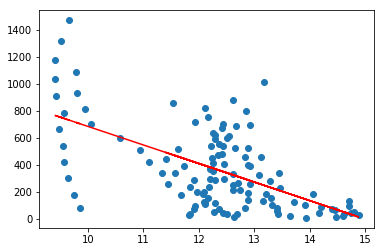

In [208]:
ox = x1
oy = b0 + b1 * ox

plt.scatter(x1, y1)
plt.plot(ox, oy, color='red')

Посчитаем коэффициент детерминации, среднюю ошибку аппроксимации.

In [209]:
z1 = b0 + b1 * x1

print(f'real: {y1[10:20]}')
print(f'pred: {z1[10:20]}')

real: [128.004   7.354  20.827  39.795  61.322  81.715 105.624 131.331 156.876
 185.016]
pred: [174.06905418 145.20595245 185.06452151 215.30205666 216.67649007
 216.67649007 229.04639082 251.03732547 231.79525765 242.79072497]


In [210]:
# Коффициент детерминации

In [211]:
R1 = z1.var() / y1.var()
R1

0.3560450998447315

Посчитаем среднюю ошибку аппроксимации

In [212]:
def mean_approximation_error(y_real, y_pred):
    return np.abs((y_real - y_pred) / y_real).mean()

In [213]:
mean_approximation_error(y1, z1)

1.6356194002886497

Оценка значимости уравнения линейной регрессии

In [214]:
k1 = 1
k2 = n1-1-1

T1 = (R1 / (1 - R1)) * (k2 / k1)
T1

5.5290378217307286

In [215]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

4.9646027437307145

Имеем $T > F_{crit}$, поэтому уравнение регрессии статистически значимо.

In [216]:
# анализ ОБЪЕМА выданных кредитов в зависимости от измененя % ставки
x1 = np.array(data.loc['2009-03-01':, 'rate'])
y1 = np.array(data.loc['2009-03-01':, 'Value']/1000)

Найдём коэффициенты линейной регрессии:

In [217]:
y1

array([  14.384,   23.33 ,   32.453,   41.733,   52.363,   63.288,
         73.726,   86.153,  101.377,  116.891,  142.968,    8.016,
         23.154,   46.163,   72.265,   97.227,  125.9  ,  157.548,
        188.524,  222.96 ,  260.473,  301.488,  364.634,   19.901,
         54.28 ,  101.913,  152.437,  204.872,  265.304,  323.275,
        386.388,  452.674,  521.529,  596.508,  697.417,   38.606,
        102.355,  179.153,  264.049,  343.701,  424.105,  510.527,
        604.721,  690.82 ,  791.792,  895.13 , 1017.316,   51.472,
        131.412,  224.235,  336.199,  429.229,  535.188,  654.765,
        774.624,  894.584, 1029.124, 1160.728, 1338.731,   79.003,
        197.265,  333.115,  493.603,  628.163,  766.009,  922.855,
       1067.947, 1215.518, 1379.684, 1528.991, 1753.294,   70.259,
        149.64 ,  217.176,  297.857,  371.332,  458.999,  555.335,
        650.852,  759.239,  870.312,  982.732, 1157.76 ,   61.771,
        204.39 ,  323.38 ,  446.285,  550.082,  664.227,  774.

In [218]:
b1 = (np.mean(x1 * y1) - np.mean(x1) * np.mean(y1)) / (np.mean(x1 ** 2) - np.mean(x1) ** 2)
b1

-279.67992431393674

In [219]:
b0 = np.mean(y1) - b1 * np.mean(x1)
b0

4067.108853343876

Построим scatter plot по данным и отметим на нём прямую линейной регрессии, полученную в п. 1.

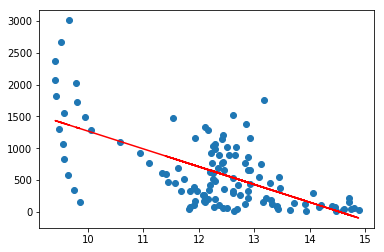

In [220]:
ox = x1
oy = b0 + b1 * ox

plt.scatter(x1, y1)
plt.plot(ox, oy, color='red')

Посчитаем коэффициент детерминации, среднюю ошибку аппроксимации.

In [221]:
z1 = b0 + b1 * x1

print(f'real: {y1[10:20]}')
print(f'pred: {z1[10:20]}')

real: [142.968   8.016  23.154  46.163  72.265  97.227 125.9   157.548 188.524
 222.96 ]
pred: [229.90029176 171.16750765 252.2746857  313.80426905 316.60106829
 316.60106829 341.77226148 386.52104937 347.36585997 369.74025391]


In [222]:
# Коффициент детерминации

In [223]:
R1 = z1.var() / y1.var()
R1

0.40105427153886297

Посчитаем среднюю ошибку аппроксимации

In [224]:
mean_approximation_error(y1, z1)

1.9296620707442476

Оценка значимости уравнения линейной регрессии

In [225]:
k1 = 1
k2 = n1-1-1

T1 = (R1 / (1 - R1)) * (k2 / k1)
T1

6.696003535567173

In [226]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

4.9646027437307145

Имеем $T > F_{crit}$, поэтому уравнение регрессии статистически значимо.

# Выводы

1. При анализе двух периодов (с 2013-05-01 по 2014-04-01 и с 2015-05-01 по 2016-04-01) статистических расличий по выборочному среднему (кол-во и объем кредитов не выявлено) Однако, это до- и пост- кризисный периоды

2. При помощи подели линейной регрессии выявлена статистически знакимая отрицательная зависимость между объемом и количеством выданных кредиотов и уровнем процентной ставки

3. Также нужно проверить на нормальность ошибок лин регрессии, но уже не успел по времени.